<a href="https://colab.research.google.com/github/ammad3059/deep_learning_projects/blob/main/stock_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
up = files.upload() 

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [4]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
data.shape

(1258, 6)

In [6]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [8]:
data = data.set_index('Date')

In [9]:
data.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"


In [10]:
data['Close'] = data['Close'].str.replace(',', '')
data['Close'] = pd.to_numeric(data['Close'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 1/3/2012 to 12/30/2016
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   object 
dtypes: float64(4), object(1)
memory usage: 59.0+ KB


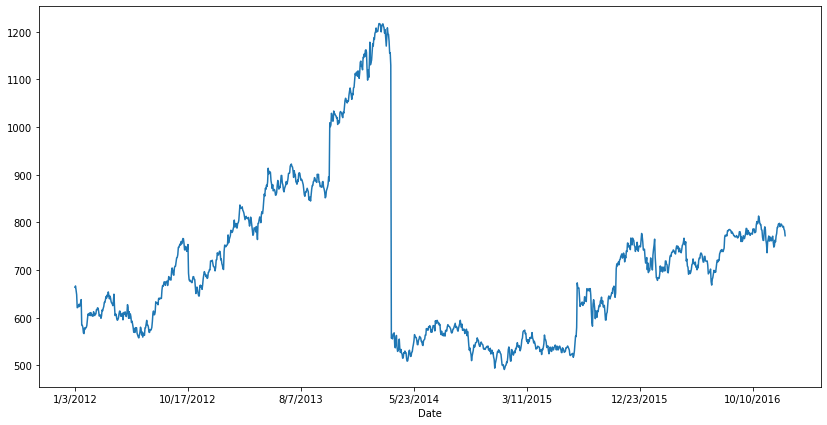

In [12]:
data['Close'].plot(figsize=[14,7])

In [13]:
closing_data = data.filter(['Close'])

In [14]:
closing_data.head()

,Close
Date,
1/3/2012,663.59
1/4/2012,666.45
1/5/2012,657.21
1/6/2012,648.24
1/9/2012,620.76


In [15]:
dataset = closing_data.values

In [16]:
dataset[:5]

array([[663.59],
       [666.45],
       [657.21],
       [648.24],
       [620.76]])

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

In [18]:
scaled_data[:5]

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       [0.21641884],
       [0.1785483 ]])

In [19]:
scaled_data.shape

(1258, 1)

In [20]:
training_data = int(scaled_data.shape[0]*0.8)

In [21]:
training_data

1006

In [22]:
x_train = []
y_train = []
for i in range(60,training_data):
  x_train.append(scaled_data[i-60:i,0])
  y_train.append(scaled_data[i,0])

In [23]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(946, 60)

In [24]:
x_train[0]

array([0.23757287, 0.24151427, 0.22878051, 0.21641884, 0.1785483 ,
       0.17947163, 0.18335791, 0.18841558, 0.18202114, 0.18695478,
       0.19290823, 0.2020589 , 0.12842633, 0.12777862, 0.12146686,
       0.1057426 , 0.10382702, 0.12015766, 0.11701556, 0.12033681,
       0.12132905, 0.12721359, 0.14263468, 0.16016427, 0.15698083,
       0.16121164, 0.1634304 , 0.15579565, 0.16443642, 0.16108761,
       0.15531331, 0.1566363 , 0.15404545, 0.16691702, 0.15859322,
       0.15607128, 0.16128054, 0.16046746, 0.17295316, 0.17276022,
       0.17846561, 0.17688078, 0.16726155, 0.15448645, 0.15702217,
       0.15749073, 0.1480231 , 0.15474829, 0.17211251, 0.16964569,
       0.17671541, 0.18209005, 0.19436903, 0.19370754, 0.20262393,
       0.21096151, 0.20620702, 0.21546794, 0.21229828, 0.22430164])

In [25]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))

In [26]:
model = Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.fit(x_train,y_train,epochs=10,verbose=2, batch_size=2)

Epoch 1/10
473/473 - 32s - loss: 0.0116
Epoch 2/10
473/473 - 12s - loss: 0.0060
Epoch 3/10
473/473 - 12s - loss: 0.0044
Epoch 4/10
473/473 - 12s - loss: 0.0043
Epoch 5/10
473/473 - 12s - loss: 0.0037
Epoch 6/10
473/473 - 12s - loss: 0.0035
Epoch 7/10
473/473 - 12s - loss: 0.0036
Epoch 8/10
473/473 - 12s - loss: 0.0028
Epoch 9/10
473/473 - 12s - loss: 0.0026
Epoch 10/10
473/473 - 12s - loss: 0.0030


In [29]:
testing_data = scaled_data[training_data-60:]

In [30]:
len(testing_data)

312

In [31]:
x_test = []
y_test = []
y_test = dataset[training_data:]
for i in range(60,len(testing_data)):
  x_test.append(testing_data[i-60:i,0])

In [32]:
x_test,y_test = np.array(x_test),np.array(y_test)
x_test.shape

(252, 60)

In [33]:
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))

In [34]:
predictions = model.predict(x_test)
rmse = np.sqrt(np.mean(y_test-predictions)**2)

In [35]:
print(rmse)

743.1209528365541


In [36]:
mypredictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


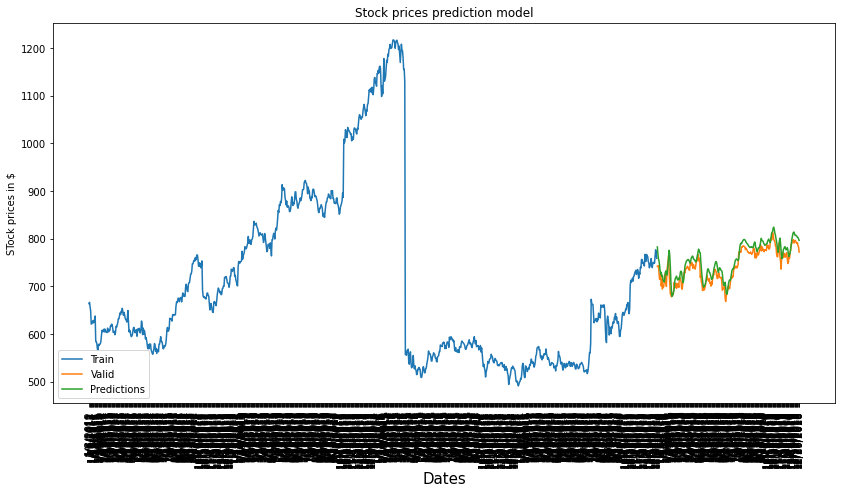

In [37]:
train = closing_data[:training_data]
valid = closing_data[training_data:]
valid['predicts'] = mypredictions
plt.figure(figsize=(14,7))
plt.xlabel('Dates',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('STock prices in $')
plt.title('Stock prices prediction model')
plt.plot(train['Close'])
plt.plot(valid.loc[:,('Close','predicts')])
plt.legend(['Train','Valid','Predictions'],loc='lower left')
plt.show()